In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
df=pd.read_csv('car_evaluation.csv',header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [15]:
for col in df.columns:
    
    print(df[col].value_counts()) 

buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64
maint
3    432
0    432
2    432
1    432
Name: count, dtype: int64
doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64
persons
0    576
1    576
2    576
Name: count, dtype: int64
lug_boot
2    576
1    576
0    576
Name: count, dtype: int64
safety
1    576
2    576
0    576
Name: count, dtype: int64
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [16]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [19]:
x = df.drop('class', axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE(random_state=42).fit_resample(x_train, y_train)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt= DecisionTreeClassifier(random_state=42, class_weight='balanced')

gs= GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)
gs.best_score_ , gs.best_params_

(np.float64(0.9904452779861632),
 {'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        77
           1       1.00      0.79      0.88        14
           2       0.99      0.98      0.99       242
           3       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.97      0.89      0.93       346
weighted avg       0.97      0.97      0.97       346



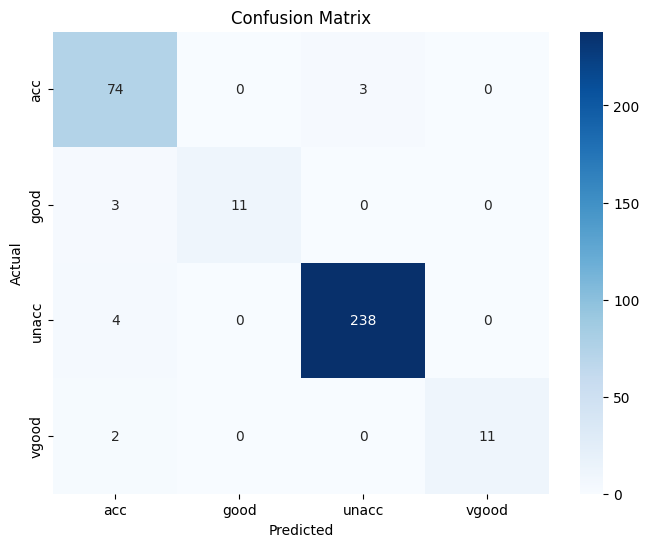

In [34]:
best_dt = gs.best_estimator_
best_dt.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

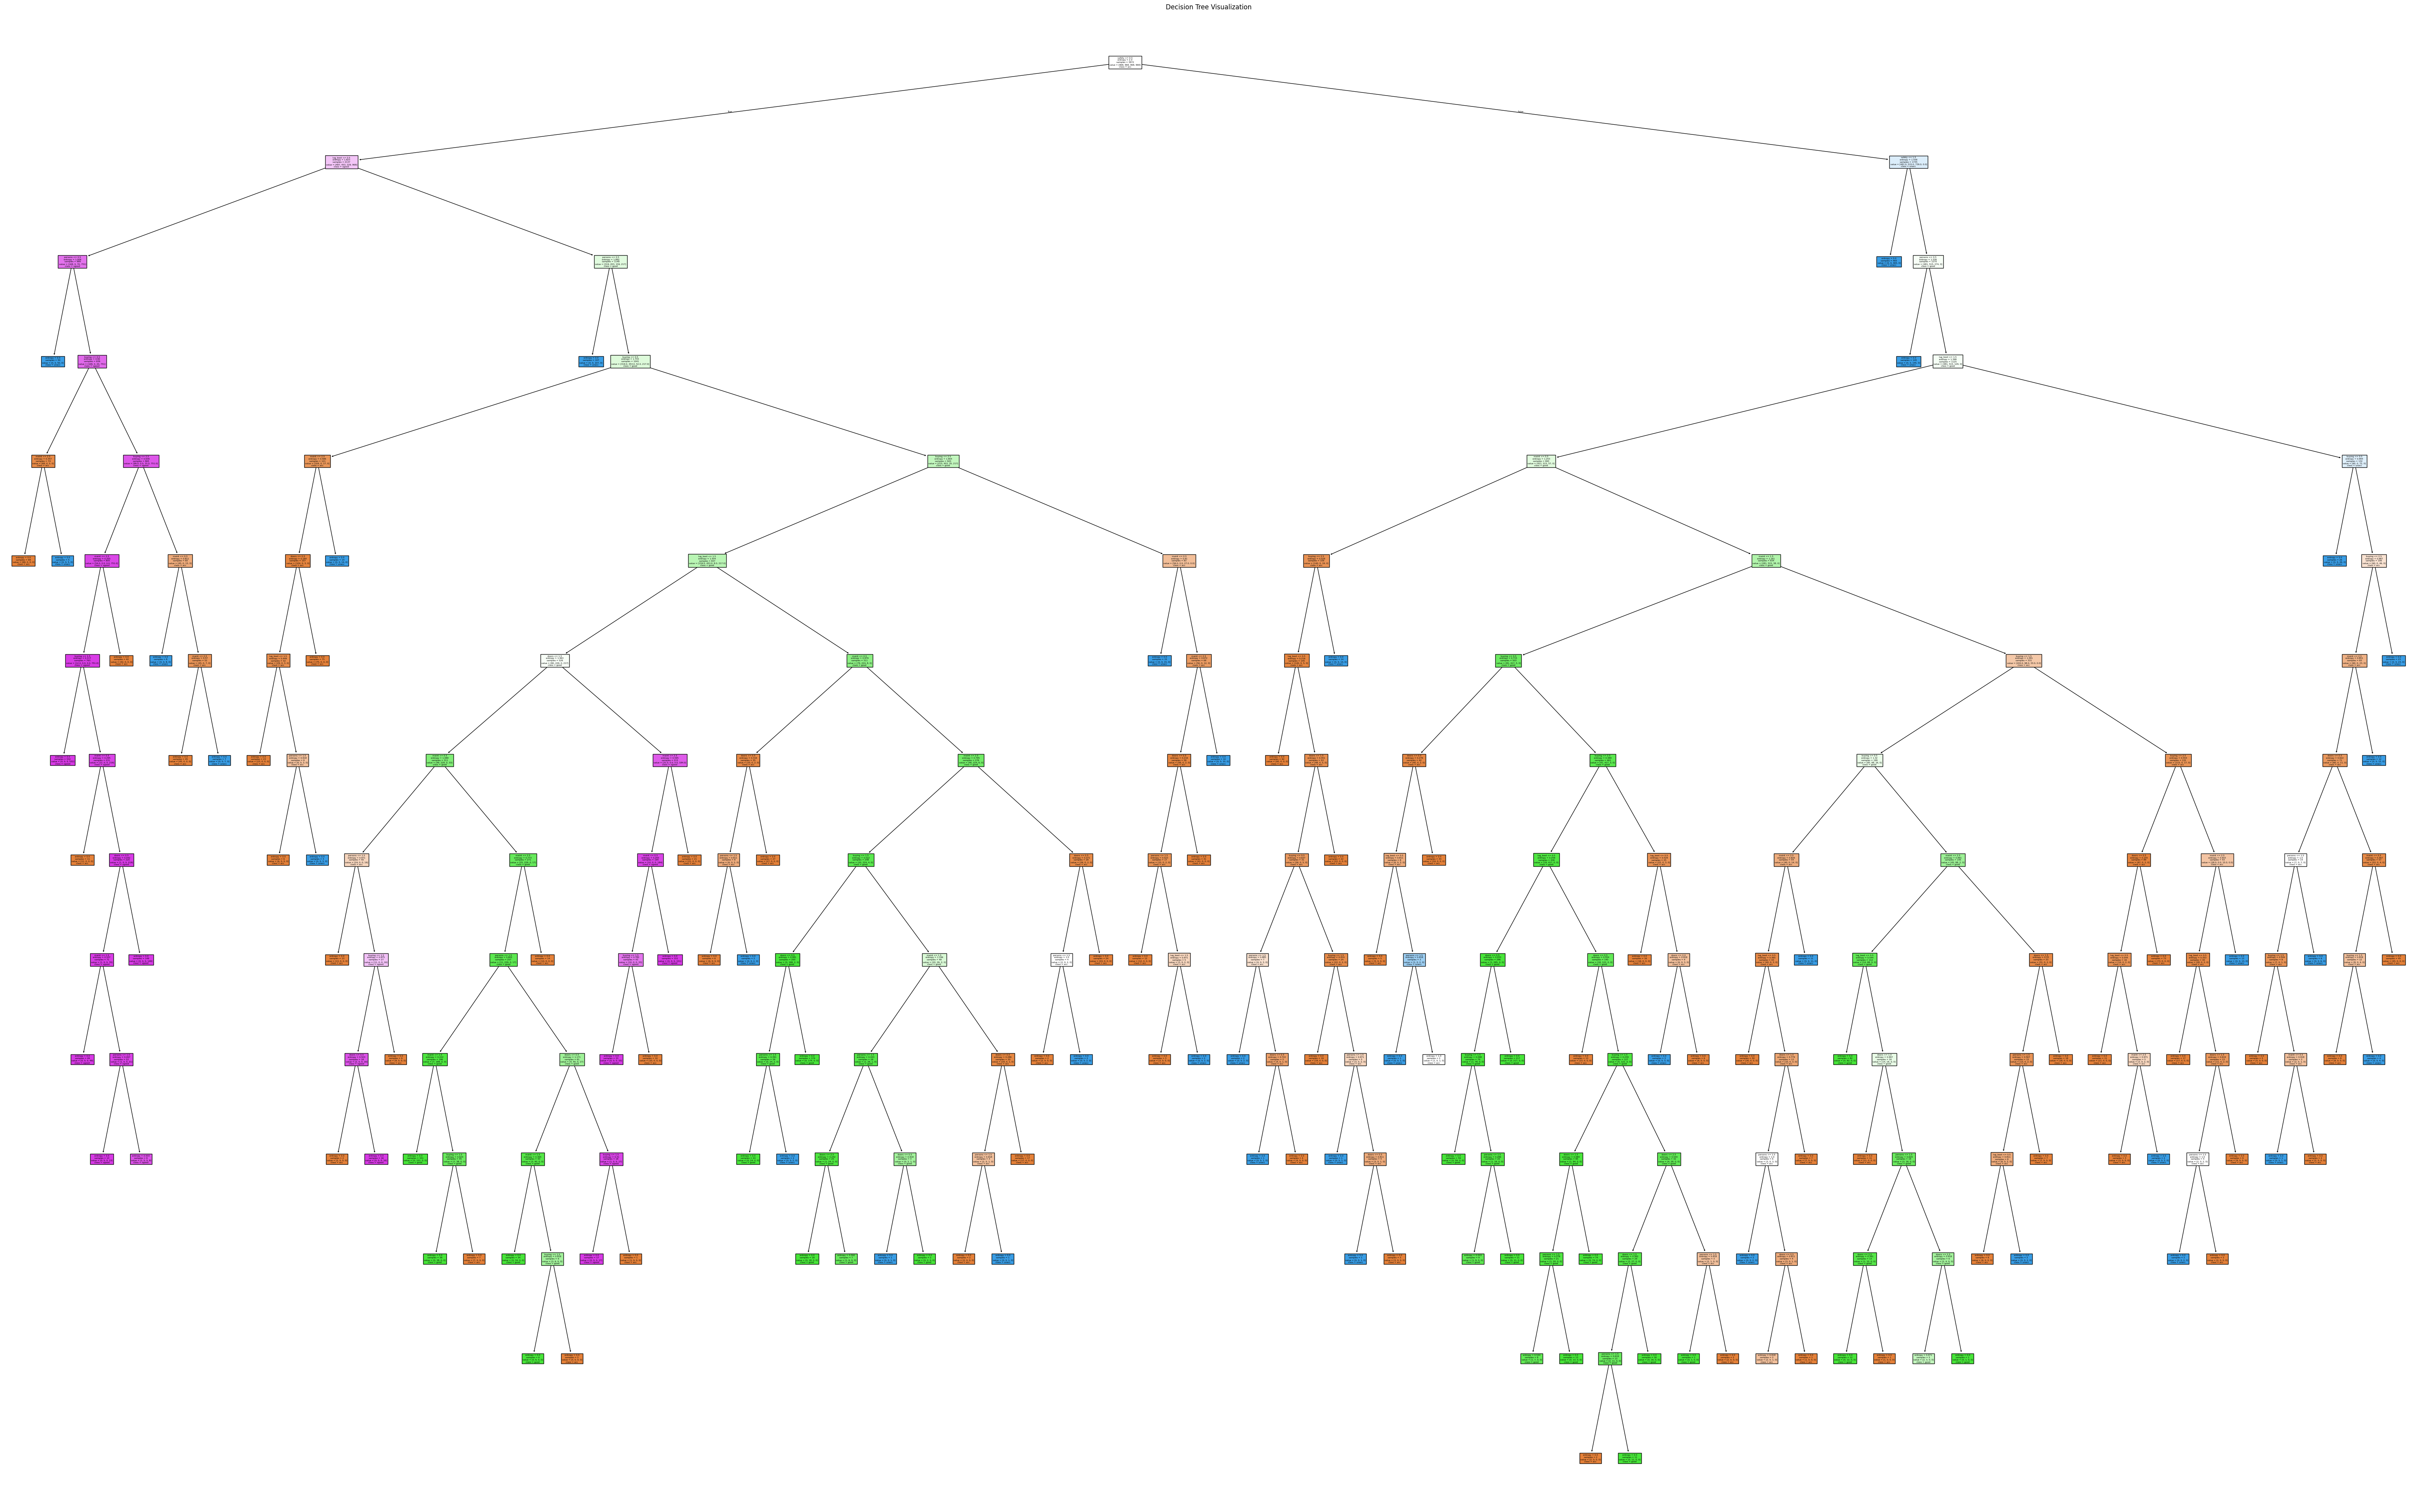

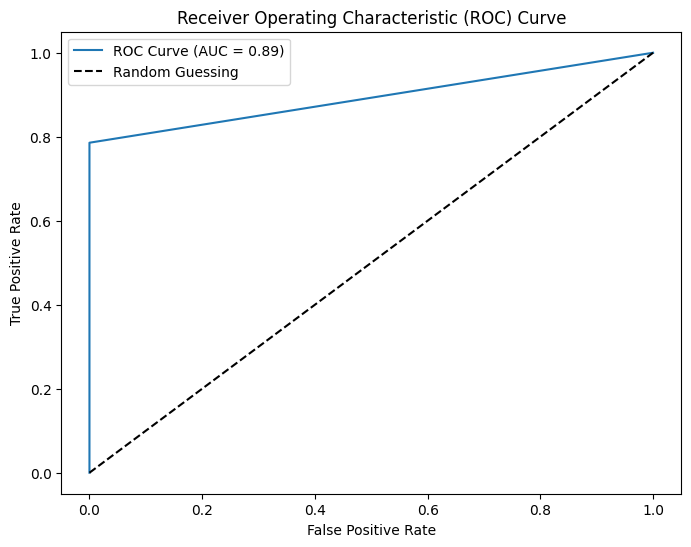

In [28]:
from sklearn.tree import plot_tree
from matplotlib import rcParams
rcParams['figure.figsize'] = (80, 50)
plot_tree(best_dt, filled=True, feature_names=x.columns, class_names=le.classes_)
plt.title('Decision Tree Visualization')
plt.show()
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_prob = best_dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


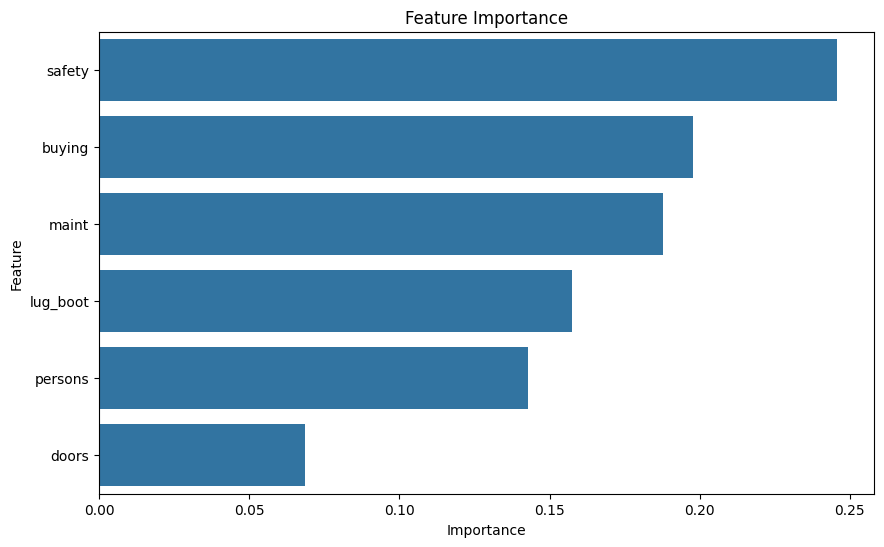

In [35]:
data_frame = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_dt.feature_importances_
})
data_frame = data_frame.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=data_frame)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [36]:
y_pred = best_dt.predict(x_test)

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

predictions_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})

print(predictions_df.head(20))

   Actual Predicted
0    good      good
1   unacc     unacc
2   unacc     unacc
3   unacc     unacc
4     acc       acc
5   unacc     unacc
6   unacc     unacc
7     acc       acc
8   unacc     unacc
9   unacc     unacc
10  unacc     unacc
11  unacc     unacc
12  unacc     unacc
13  unacc     unacc
14  vgood     vgood
15  unacc     unacc
16    acc       acc
17  unacc     unacc
18  unacc     unacc
19  unacc     unacc


In [37]:
misclassified = predictions_df[predictions_df['Actual'] != predictions_df['Predicted']]
print(misclassified)

    Actual Predicted
88   unacc       acc
91   unacc       acc
98    good       acc
129  vgood       acc
151  unacc       acc
169    acc     unacc
185    acc     unacc
191   good       acc
283  vgood       acc
299    acc     unacc
303  unacc       acc
308   good       acc
